#**Part A**

#1. Handling Missing Data

1) Create a DataFrame with missing values and perform the following,

*   Identify missing values
*   Fill missing values with specified values
*   Drop rows with any missing values

In [1]:
# Import necessary libraries
import pandas as pd  # for data manipulation and analysis
import numpy as np   # for numerical operations, including handling NaN values

# Create a dictionary with some missing values (np.nan)
data1 = {
    'Name': ['Alice', 'Bob', np.nan, 'David'],
    'Age': [25, np.nan, 22, 28],
    'City': ['Colombo', 'Kandy', 'Galle', np.nan]
}

# Convert the dictionary into a pandas DataFrame
df1 = pd.DataFrame(data1)

# Check for missing values in the DataFrame (returns True for NaNs)
df1.isnull()

# Fill missing values using 'fillna':
# - Replace missing Name with 'Unknown'
# - Replace missing Age with the mean of the 'Age' column
# - Replace missing City with 'Unknown'
df1_filled = df1.fillna({
    'Name': 'Unknown',
    'Age': df1['Age'].mean(),
    'City': 'Unknown'
})

# Print the DataFrame after filling missing values
print(df1_filled)
print()

# Drop any rows that contain at least one missing value
df1_dropped = df1.dropna()

# Print the DataFrame after dropping rows with missing values
print(df1_dropped)


      Name   Age     City
0    Alice  25.0  Colombo
1      Bob  25.0    Kandy
2  Unknown  22.0    Galle
3    David  28.0  Unknown

    Name   Age     City
0  Alice  25.0  Colombo


#2. Removing Duplicates

2) Create a DataFrame with duplicate rows and,
*   Detect duplicate rows
*   Remove them

In [2]:
# Create a dictionary with duplicate 'ID' and 'Name' values
data2 = {
    'ID': [1, 2, 3, 3, 4, 5, 5],           # 'ID' column has duplicate values (3 and 5)
    'Name': ['A', 'B', 'C', 'C', 'D', 'E', 'E']  # 'Name' column has duplicate values ('C' and 'E')
}

# Create a DataFrame from the dictionary
df2 = pd.DataFrame(data2)

# Print the original DataFrame
print(df2)
print()

# Use duplicated() to detect and return the rows that are exact duplicates (both ID and Name)
print(df2[df2.duplicated()])
print()

# Use drop_duplicates() to remove all exact duplicate rows
# Only the first occurrence of each duplicate is kept by default
df2_unique = df2.drop_duplicates()

# Print the DataFrame after removing duplicate rows
print(df2_unique)

   ID Name
0   1    A
1   2    B
2   3    C
3   3    C
4   4    D
5   5    E
6   5    E

   ID Name
3   3    C
6   5    E

   ID Name
0   1    A
1   2    B
2   3    C
4   4    D
5   5    E


#3. Fixing Data Types

 3) Create a DataFrame with incorrect data types and convert them to appropriate types.

In [3]:
# Create a dictionary with string values for ID, JoinDate, and Salary
data3 = {
    'ID': ['101', '102', '103'],                     # IDs are stored as strings
    'JoinDate': ['2022-01-10', '2022-02-15', '2022-03-01'],  # Join dates as string format
    'Salary': ['50000', '60000', '70000']            # Salaries are also strings
}

# Create a DataFrame from the dictionary
df3 = pd.DataFrame(data3)

# Display the data types of each column (they will all show as 'object' initially)
print(df3.dtypes)
print()

# Convert the 'ID' column from string to integer type
df3['ID'] = df3['ID'].astype(int)

# Convert the 'JoinDate' column from string to datetime type
df3['JoinDate'] = pd.to_datetime(df3['JoinDate'])

# Convert the 'Salary' column from string to float type
df3['Salary'] = df3['Salary'].astype(float)

# Display the updated data types after conversion
print(df3.dtypes)


ID          object
JoinDate    object
Salary      object
dtype: object

ID                   int64
JoinDate    datetime64[ns]
Salary             float64
dtype: object


#4. Standardizing Text Data

4) Create a DataFrame with inconsistent capitalization and whitespaces.
*   Remove extra spaces
*   Convert all text to lowercase

In [4]:
# Create a dictionary with product names that include inconsistent casing and extra spaces
data4 = {
    'Product': [' Apple ', 'BaNaNa', ' Cherry', 'DaTE ']  # Leading/trailing spaces and mixed casing
}

# Create a DataFrame from the dictionary
df4 = pd.DataFrame(data4)

# Print the original DataFrame
print(df4)
print()

# Use str.strip() to remove leading and trailing spaces from each product name
df4['Product'] = df4['Product'].str.strip()

# Print the DataFrame after removing extra spaces
print(df4)
print()

# Use str.lower() to convert all product names to lowercase
df4['Product'] = df4['Product'].str.lower()

# Print the DataFrame after converting text to lowercase
print(df4)


   Product
0   Apple 
1   BaNaNa
2   Cherry
3    DaTE 

  Product
0   Apple
1  BaNaNa
2  Cherry
3    DaTE

  Product
0   apple
1  banana
2  cherry
3    date


#5. Outlier Detection and Handling

5) Create a DataFrame with numeric outliers and,
*   Detect values greater than a threshold
*   Replace them with the mean

In [5]:
# Create a dictionary with test scores, including some unusually high values (potential outliers)
data5 = {
    'Score': [55, 60, 62, 90, 95, 200, 58, 59, 210]  # 200 and 210 are potential outliers
}

# Create a DataFrame from the dictionary
df5 = pd.DataFrame(data5)

# Print the original DataFrame
print(df5)
print()

# Detect outliers by selecting rows where the 'Score' is greater than 100
outliers = df5[df5['Score'] > 100]

# Print the detected outliers
print(outliers)
print()

# Calculate the mean of all non-outlier scores (i.e., scores <= 100)
mean_score = df5[df5['Score'] <= 100]['Score'].mean()

# Replace all outlier scores with the calculated mean value
df5['Score'] = df5['Score'].apply(lambda x: mean_score if x > 100 else x)

# Print the updated DataFrame after replacing outliers
print(df5)

   Score
0     55
1     60
2     62
3     90
4     95
5    200
6     58
7     59
8    210

   Score
5    200
8    210

       Score
0  55.000000
1  60.000000
2  62.000000
3  90.000000
4  95.000000
5  68.428571
6  58.000000
7  59.000000
8  68.428571


#**Part B**

Basic Image Processing

#Load the image

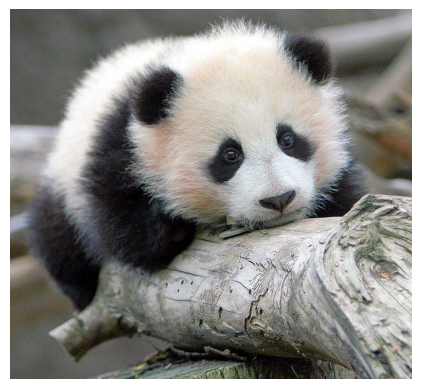

In [6]:
# Imports
from PIL import Image                      # Import the Image class from the Pillow library to handle image files
import matplotlib.pyplot as plt            # Import matplotlib's pyplot for image display and plotting

# Open the image file
image = Image.open('panda.jpg')            # Load the image using PIL

# Display the image using matplotlib
plt.imshow(image)                          # Show the image content in a matplotlib plot
plt.axis('off')                            # Turn off axis ticks and labels for a cleaner display
plt.show()                                 # Render and display the image


#Convert to Grayscale

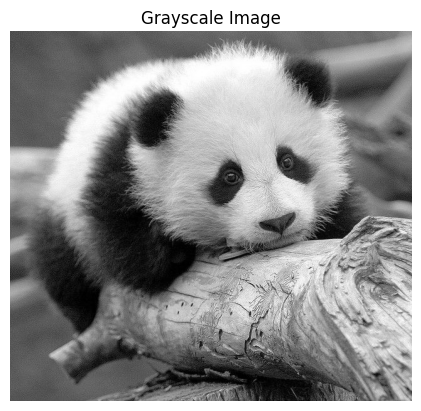

In [7]:
# Convert the original image to grayscale and display it using matplotlib
gray_image = image.convert("L")         # Convert the image to grayscale ('L' mode stands for luminance)
plt.imshow(gray_image, cmap='gray')     # Display the grayscale image with a gray colormap
plt.axis('off')                         # Hide the axis for a cleaner look
plt.title("Grayscale Image")            # Set the title of the plot
plt.show()                              # Render the image

#Resize the Image

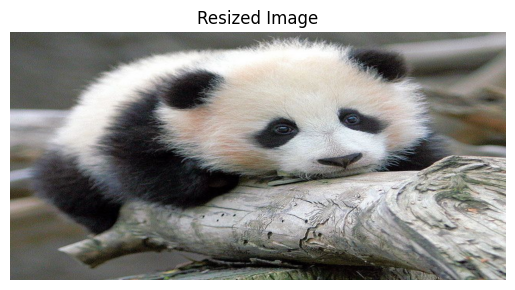

In [8]:
# resize -> Resize the original image
resized_image = image.resize((1000, 500))
plt.imshow(resized_image)
plt.axis('off')
plt.title("Resized Image")
plt.show()

#Rotate the Image

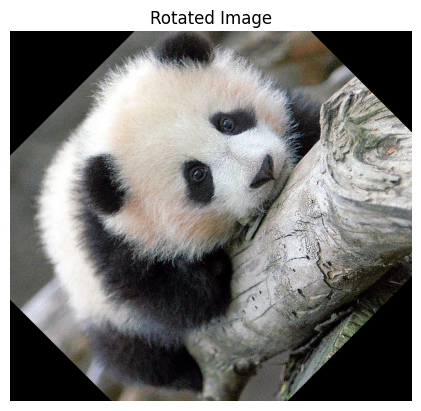

In [9]:
# rotate(45) -> Rotate 45 degrees
rotated_image = image.rotate(45)
plt.imshow(rotated_image)
plt.axis('off')
plt.title("Rotated Image")
plt.show()

#Flip the Image (Mirror)

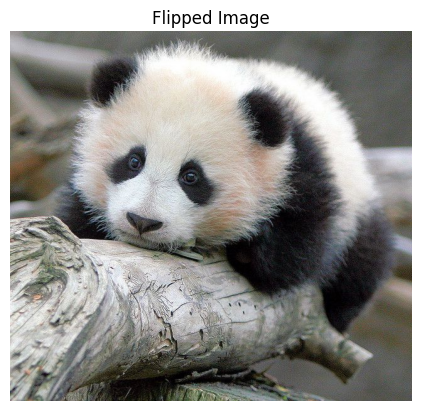

In [10]:
# transpose -> Flip the image
flipped_image = image.transpose(Image.FLIP_LEFT_RIGHT)
plt.imshow(flipped_image)
plt.axis('off')
plt.title("Flipped Image")
plt.show()

#Crop a Region

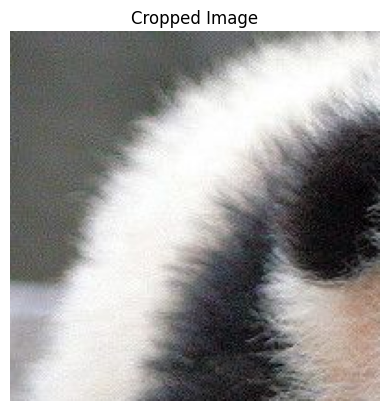

In [11]:
# crop -> crop the image
# Crop box: (left, upper, right, lower)
cropped_image = image.crop((50, 50, 250, 250))
plt.imshow(cropped_image)
plt.axis('off')
plt.title("Cropped Image")
plt.show()

# **Filtering**

#Blur Filter

In [12]:
# Import ImageFilter module from Pillow to apply image filters
from PIL import ImageFilter

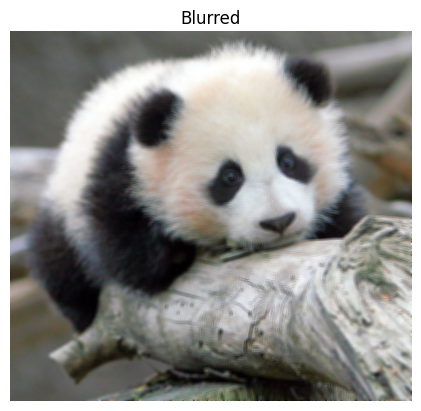

In [13]:
# BLUR -> Apply blur filter
blurred = image.filter(ImageFilter.BLUR)
plt.imshow(blurred)
plt.axis('off')
plt.title("Blurred")
plt.show()

#Contour Filter

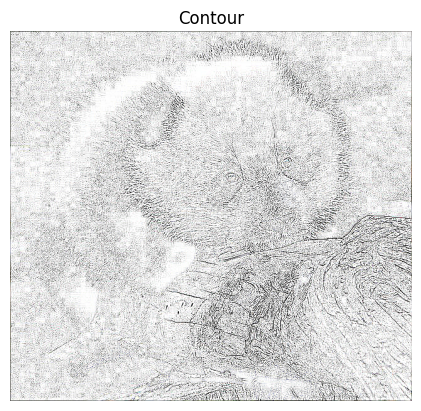

In [14]:
# CONTOUR -> Apply contour effect
contour = image.filter(ImageFilter.CONTOUR)
plt.imshow(contour)
plt.axis('off')
plt.title("Contour")
plt.show()

# Detail Enhancement

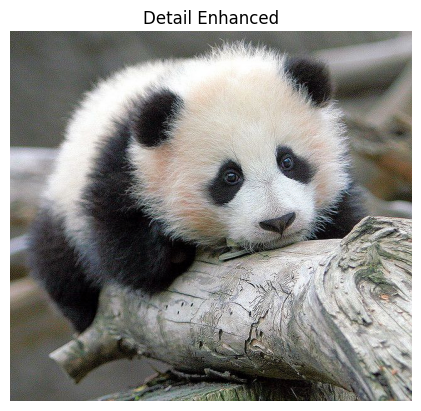

In [15]:
# DETAIL -> Apply detail enhancement effect
detailed = image.filter(ImageFilter.DETAIL)
plt.imshow(detailed)
plt.axis('off')
plt.title("Detail Enhanced")
plt.show()

#Edge Enhancement

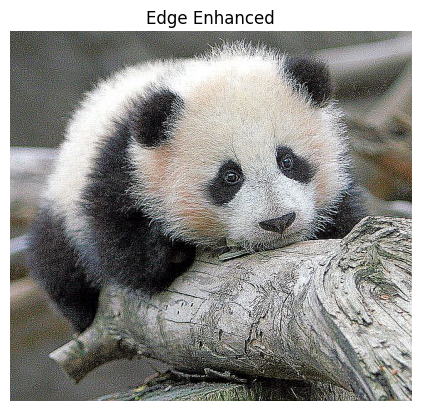

In [16]:
# EDGE_ENHANCE -> Apply edge enhancement effect
edges = image.filter(ImageFilter.EDGE_ENHANCE)
plt.imshow(edges)
plt.axis('off')
plt.title("Edge Enhanced")
plt.show()

#Emboss

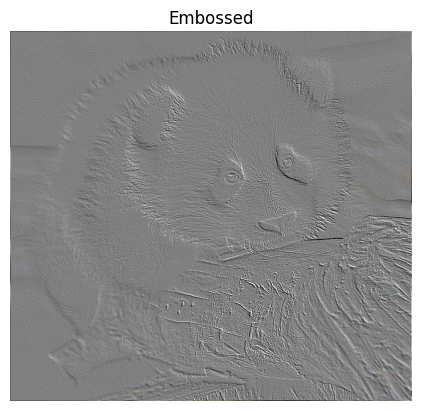

In [17]:
# EMBOSS -> Apply emboss effect
emboss = image.filter(ImageFilter.EMBOSS)
plt.imshow(emboss)
plt.axis('off')
plt.title("Embossed")
plt.show()

#Sharpen

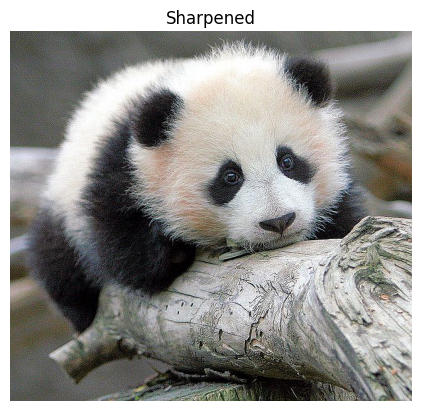

In [18]:
# SHARPEN -> Apply sharpen effect
sharpened = image.filter(ImageFilter.SHARPEN)
plt.imshow(sharpened)
plt.axis('off')
plt.title("Sharpened")
plt.show()


#Custom Convolution Filter (Kernel)

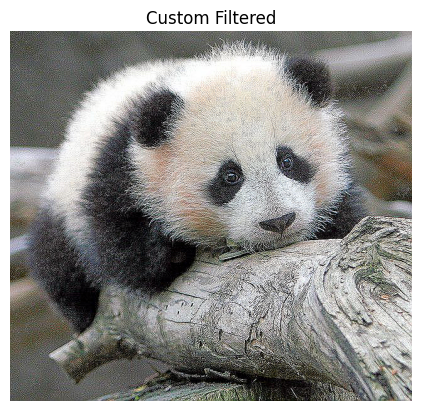

In [19]:
# Kernel -> Apply custom 3x3 sharpening kernel filter
kernel = ImageFilter.Kernel(
    size=(3, 3),
    kernel=[0, -1, 0, -1, 5, -1, 0, -1, 0],
    scale=None,  # Automatically calculated
    offset=0
)
custom_filtered = image.filter(kernel)
plt.imshow(custom_filtered)
plt.axis('off')
plt.title("Custom Filtered")
plt.show()

#Edge Detection (Canny - OpenCV)

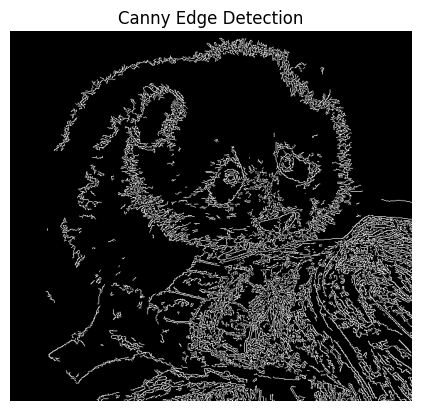

In [20]:
import cv2  # Import OpenCV for image processing
import matplotlib.pyplot as plt  # Import matplotlib for displaying images

# Read the image in grayscale mode
img = cv2.imread('panda.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detection with threshold values 100 and 200
edges = cv2.Canny(img, 100, 200)

# Display the edges detected image in grayscale
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()

#Histogram Equalization

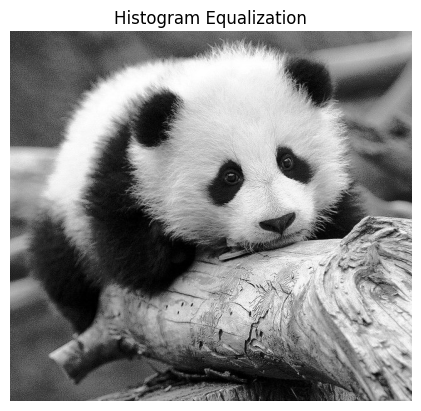

In [21]:
# cv2.equalizeHist -> Apply histogram equalization to enhance image contrast
equalized = cv2.equalizeHist(img)
plt.imshow(equalized, cmap='gray')
plt.title("Histogram Equalization")
plt.axis('off')
plt.show()


#Thresholding

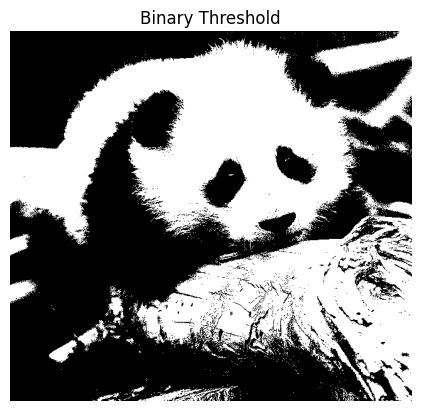

In [22]:
# cv2.threshold -> Apply binary thresholding to convert image to black and white
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
plt.imshow(binary, cmap='gray')
plt.title("Binary Threshold")
plt.axis('off')
plt.show()

#Color Space Conversion (Ex- RGB to HSV)

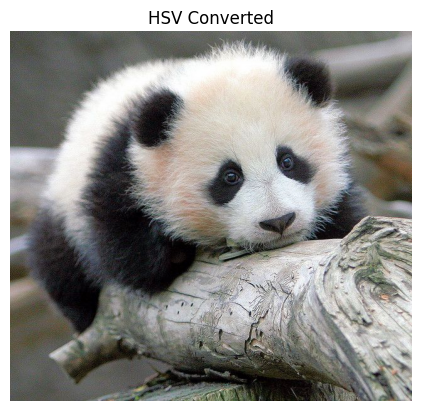

In [23]:
# cv2.cvtColor -> Convert BGR image to HSV color space and display in RGB for matplotlib
color_img = cv2.imread('panda.jpg')
hsv = cv2.cvtColor(color_img, cv2.COLOR_BGR2HSV)
plt.imshow(cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB))
plt.title("HSV Converted")
plt.axis('off')
plt.show()


#Save the Processed Image

In [25]:
# save() -> Save the grayscale image to a file named 'panda_gray.jpg'
gray_image.save("panda_gray.jpg")